## Data Description & Problem statement

* This data is from U.S. Department of Agriculture. It consists of two time series from 1930 to 1983, one of U.S. egg production and the other the estimated U.S. chicken population.

* The dataset has the following attributes:

1: Year: The Year in which data point has been collected.

2: chicken: Polulation of the chicken across US in the same year.

3: egg: Egg Produciton in the same year. 


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('chickegg.csv')
df.head()

,Year,chicken,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


In [3]:
df.dtypes

Year       int64
chicken    int64
egg        int64
dtype: object

In [4]:
df.shape

(54, 3)

In [5]:
df.describe()

,Year,chicken,egg
count,54.000000,54.000000,54.000000
mean,1956.500000,419503.962963,4986.462963
std,15.732133,46406.940891,884.966191
min,1930.000000,364584.000000,3081.000000
25%,1943.250000,387657.500000,5008.000000
50%,1956.500000,403818.500000,5379.500000
75%,1969.750000,433772.750000,5530.500000
max,1983.000000,582197.000000,5836.000000


## Make series stationary

* Check if the data is stationary or not. 
* The plots provide little information other than the data is likely not stationary.

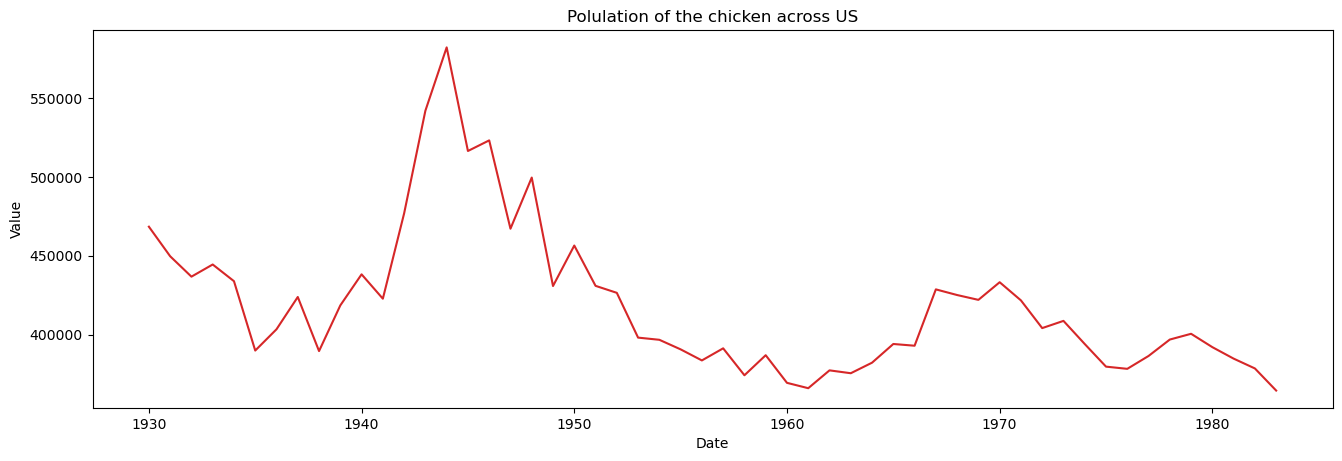

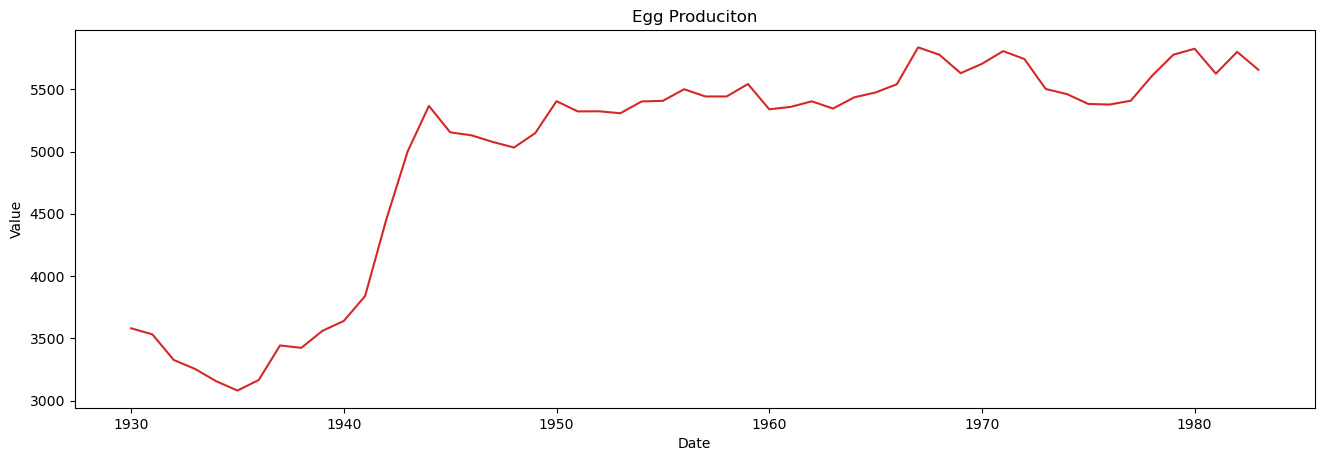

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Year, y=df.chicken, title='Polulation of the chicken across US')   
plot_df(df, x=df.Year, y=df.egg, title='Egg Produciton')  

 * Check number of difference is required to make the data stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.chicken.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.chicken.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9686288984974345
p-value: 0.3004953142442696
Critial Values:
   1%, -3.5656240522121956
Critial Values:
   5%, -2.920142229157715
Critial Values:
   10%, -2.598014675124952

KPSS Statistic: 0.320142
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [8]:
# ADF Test
result = adfuller(df.egg.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.egg.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.7154196215448776
p-value: 0.42318584637476603
Critial Values:
   1%, -3.562878534649522
Critial Values:
   5%, -2.918973284023669
Critial Values:
   10%, -2.597393446745562

KPSS Statistic: 0.464218
p-value: 0.049726
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [9]:
df_transformed = df.diff().dropna()

df = df.iloc[1:]

In [10]:
print(df.shape)
df_transformed.shape

(53, 3)


(53, 3)

In [11]:
df_transformed.head()

,Year,chicken,egg
1,1.0,-18748.0,-49.0
2,1.0,-12928.0,-205.0
3,1.0,7708.0,-72.0
4,1.0,-10586.0,-99.0
5,1.0,-43979.0,-75.0


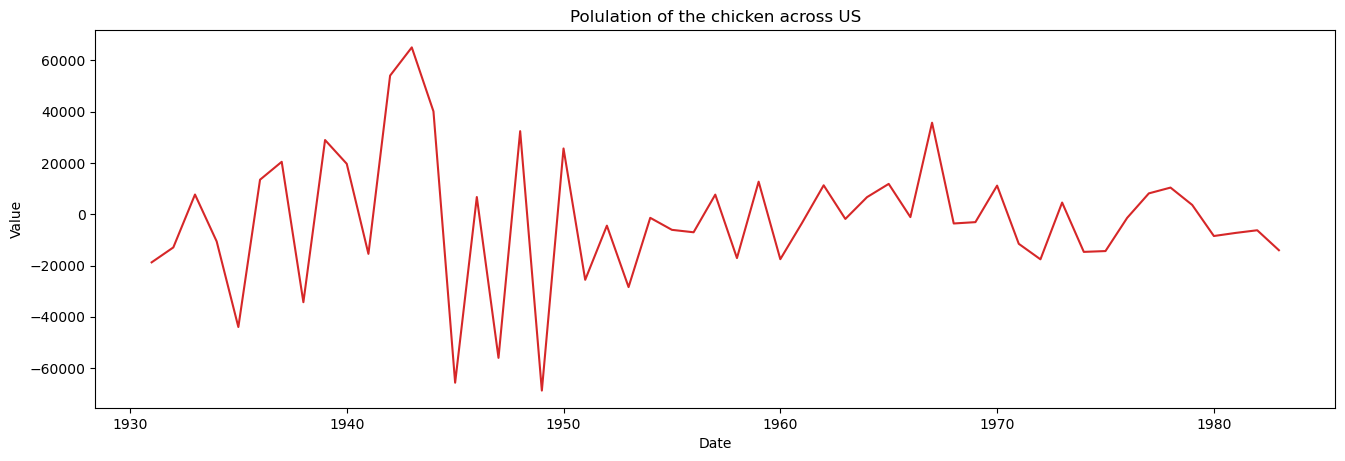

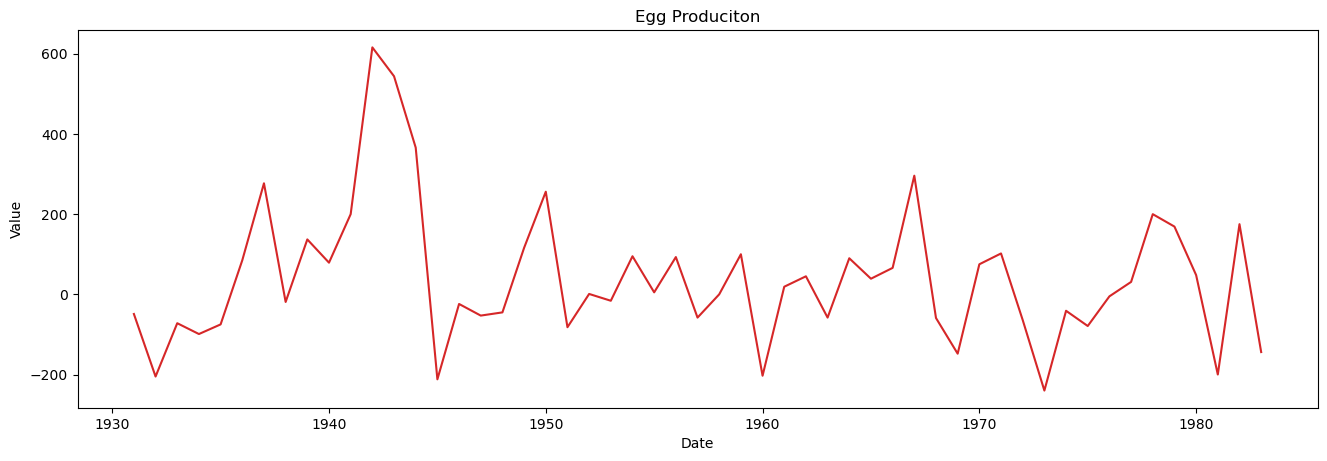

In [12]:
plot_df(df_transformed, x=df.Year, y=df_transformed.chicken, title='Polulation of the chicken across US')   
plot_df(df_transformed, x=df.Year, y=df_transformed.egg, title='Egg Produciton') 

In [ ]:
# ADF Test on transformed chicken variable 
result = adfuller(df_transformed.chicken.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


In [ ]:
# ADF Test on transformed egg variable 
result = adfuller(df_transformed.egg.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

## Test the granger Causility
 
 * There are several ways to find the optimal lag but lets consider 4th lag as of now. 
 * Do eggs granger cause chickens?
  - H0: eggs does not granger-cause chicken
  - H1: eggs granger-cause chicken

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_transformed[['chicken', 'egg']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=8.6913  , p=0.0130  , df=2
likelihood ratio test: chi2=8.0254  , p=0.0181  , df=2
parameter F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=10.2270 , p=0.0167  , df=3
likelihood ratio test: chi2=9.3049  , p=0.0255  , df=3
parameter F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1762  , p=0.0064  , df_d

{1: ({'ssr_ftest': (10.369401855024334, 0.002276547780802867, 49.0, 1),
   'ssr_chi2test': (11.004263193087048, 0.0009090256120685967, 1),
   'lrtest': (9.981851113112043, 0.0015809067346861433, 1),
   'params_ftest': (10.369401855024321, 0.0022765477808028836, 49.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.9195893294835202, 0.026801946305615505, 46.0, 2),
   'ssr_chi2test': (8.691263295811284, 0.012963317408885625, 2),
   'lrtest': (8.025361709072968, 0.018084847345911467, 2),
   'params_ftest': (3.9195893294829607, 0.02680194630562832, 46.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.9317532482730093, 0.04412921667890042, 43.0, 3),
   'ssr_chi2test': (10.227046214905847, 0.01673155519427925, 3),
   'lrtest': (9.30492593333679, 0.02549978891601833, 3),
   'params_ftest': (2.9317532482730133, 0.04412921667890011, 43.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

* p value is very low , it means eggs are granger causing chicken.

 * Do chickens granger cause eggs, at lag 4?
   - H0: chicken does not granger-cause eggs
   - H1: chicken granger-cause eggs

In [34]:
grangercausalitytests(df_transformed[['egg', 'chicken']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.5766  , p=0.4476  , df=1
likelihood ratio test: chi2=0.5734  , p=0.4489  , df=1
parameter F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=0.8571  , p=0.6515  , df=2
likelihood ratio test: chi2=0.8500  , p=0.6538  , df=2
parameter F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=0.7833  , p=0.8535  , df=3
likelihood ratio test: chi2=0.7772  , p=0.8549  , df=3
parameter F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2817  , p=0.8881  , df_d

{1: ({'ssr_ftest': (0.5433559398877741, 0.4645603271325349, 49.0, 1),
   'ssr_chi2test': (0.5766226300849848, 0.44763919540156927, 1),
   'lrtest': (0.5734490153902243, 0.44889161538627487, 1),
   'params_ftest': (0.5433559398878082, 0.46456032713251894, 49.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3865324025019798, 0.6815945120531489, 46.0, 2),
   'ssr_chi2test': (0.8570935881565638, 0.6514551055997209, 2),
   'lrtest': (0.8499712220999527, 0.6537791922582916, 2),
   'params_ftest': (0.3865324025020185, 0.6815945120531242, 46.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.22454871567222354, 0.8788077992760317, 43.0, 3),
   'ssr_chi2test': (0.7833094732751984, 0.8534548799479484, 3),
   'lrtest': (0.7772370747510422, 0.8549035149494942, 3),
   'params_ftest': (0.22454871567246934, 0.8788077992758596, 43.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

* p value is considerably high thus chickens does not granger cause eggs.

In [4]:
from statsmodels.tsa.stattools import adfuller, kpss

In [8]:
stats, p, lags, critical_values = kpss(df['chicken'], 'ct')

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [9]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical_values: {critical_values}')

Test Statistics: 0.07135380781027849
p-value: 0.1
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [10]:
if p < 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Series is stationary


In [11]:
stats, p, lags, critical_values = kpss(df['egg'], 'ct')

In [12]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical_values: {critical_values}')

Test Statistics: 0.14171824071329484
p-value: 0.05792918386426881
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [13]:
if p < 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Series is stationary


In [14]:
result = adfuller(df['chicken'])

In [15]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.9686288984974345
p-value: 0.3004953142442696
critical_values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}


In [16]:
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Series is not stationary


In [ ]:
result = adfuller(df['egg'])

In [17]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.9686288984974345
p-value: 0.3004953142442696
critical_values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}


In [18]:
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Series is not stationary


In [13]:
result = adfuller(df_transformed['chicken'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -3.775487805159608
p-value: 0.003168302498455062
critical_values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is stationary


In [14]:
result = adfuller(df_transformed['egg'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.750961559065449
p-value: 6.743493214656537e-05
critical_values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
Series is stationary
